In [1]:
from matplotlib import pyplot as plt
import numpy as np

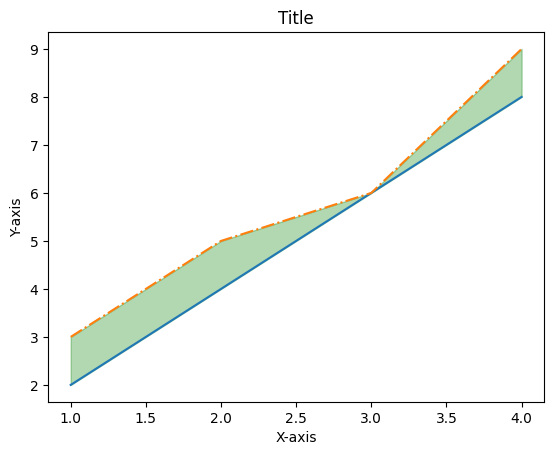

In [15]:
x = np.array([1, 2, 3, 4])
y = x*2
plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Title')
y1 = [3, 5, 6, 9]
plt.plot(x, y1, '-.')
plt.fill_between(x, y, y1, color = 'green', alpha = 0.3)
plt.show()

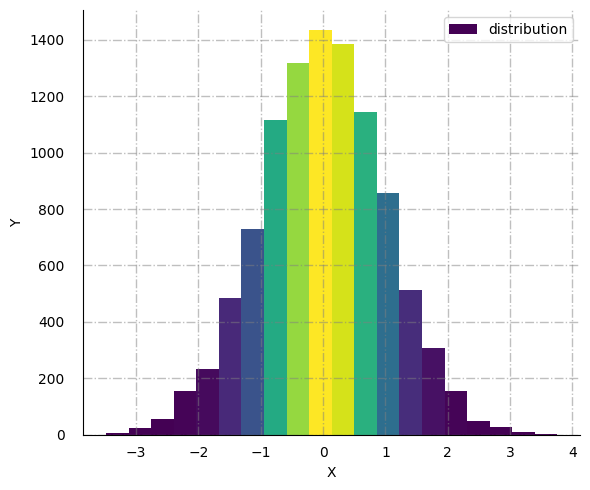

In [27]:
from matplotlib import colors

np.random.seed(10000)
x = np.random.randn(10000)
y = 0.8 ** 5 + np.random.randn(10000) + 25
fig, ax = plt.subplots(1, 1, figsize = (6, 5), tight_layout = True)

# spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# gridlines
ax.grid(color = 'grey', linestyle = '-.', linewidth = 1, alpha = 0.5)

N, bins, patches = ax.hist(x, bins = 20) # N -> arr of count of ele in each bin,\
                                          # bins -> arr of range of each bin
fracs = ((N ** 2))
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
  color = plt.cm.viridis(norm(thisfrac))
  thispatch.set_facecolor(color)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(labels = ['distribution'], loc = 'best')
plt.show()

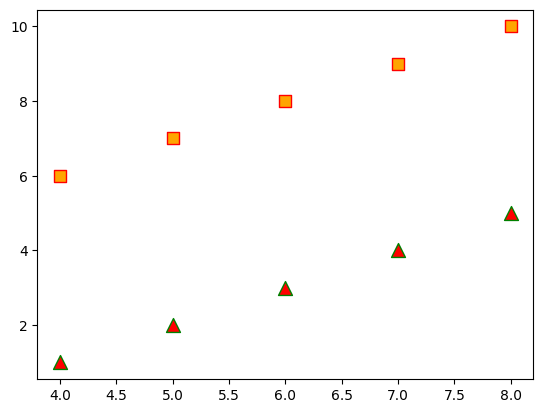

In [28]:
x = [4, 5, 6, 7, 8]
y = [1, 2, 3, 4, 5]
y1 = [6, 7, 8, 9, 10]

plt.scatter(x, y, c = 'r', marker = '^', edgecolor = 'green', s = 100)
plt.scatter(x, y1, c = 'orange', marker = 's', edgecolor = 'r', s = 80)
plt.show()

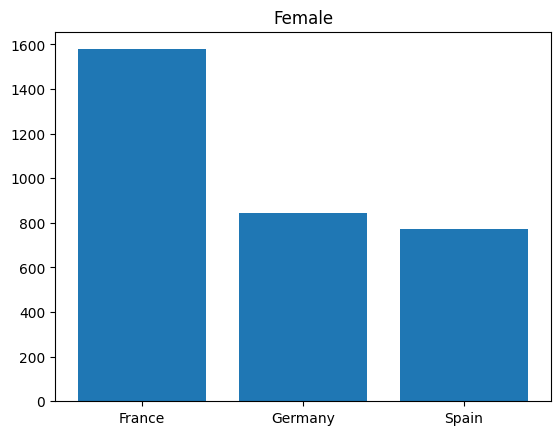

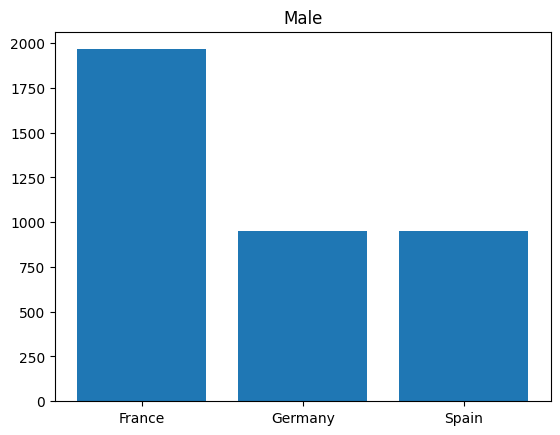

In [29]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
df = dataset[dataset['HasCrCard'] == 1]
df1 = df.groupby(['Geography', 'Gender'])['HasCrCard'].size().reset_index(name='count')
df = df1[df1['Gender'] == 'Female']
plt.bar(df['Geography'], df['count'])
plt.title('Female')
plt.figure()
df = df1[df1['Gender'] == 'Male']
plt.bar(df['Geography'], df['count'])
plt.title('Male')
plt.show()

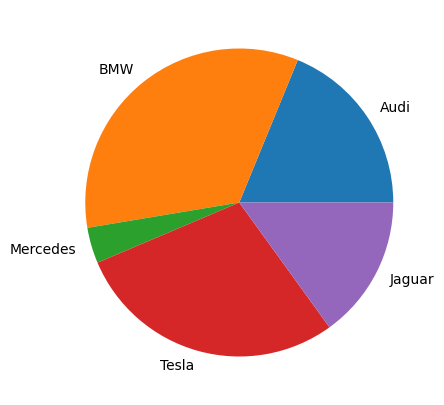

In [30]:
cars = ['Audi', 'BMW', 'Mercedes', 'Tesla', 'Jaguar']
data = [25, 45, 5, 38, 20]
fig = plt.figure(figsize = (6, 5))
plt.pie(data, labels = cars)
plt.show()

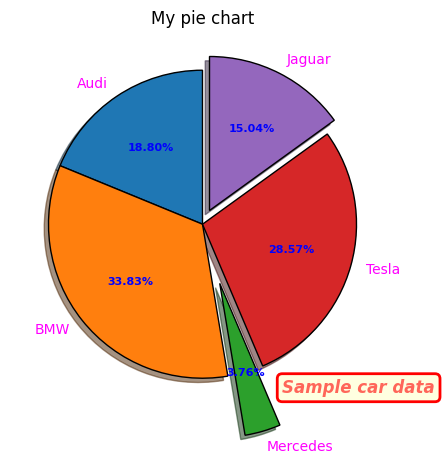

In [31]:
explode = (0, 0, 0.4, 0, 0.1)
wp = {'linewidth' : 1, 'edgecolor' : 'black'}
tp = {'color' : 'magenta'}
fig, ax = plt.subplots(figsize = (6, 5))
wedges, text, autotexts = plt.pie(data, labels = cars, explode = explode, \
    autopct = '%2.2f%%', startangle = 90, wedgeprops = wp, textprops = tp, shadow = True)
plt.setp(autotexts, size = 8, weight = 'bold', color = 'blue')
ax.set_title('My pie chart')
fig.text(0.9, 0.15, 'Sample car data', fontsize = 12, fontstyle = 'italic', \
    fontweight = 'bold', color = 'red', ha = 'right', va = 'bottom', alpha = 0.6, \
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", linewidth=2, facecolor="lightyellow"))
plt.show()

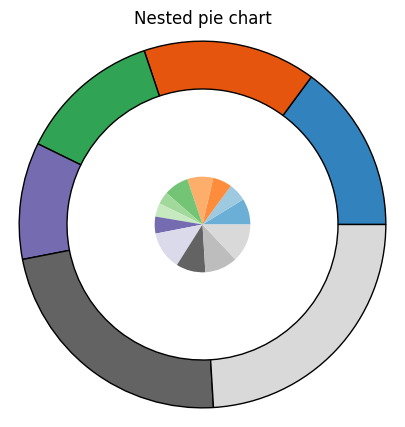

In [35]:
data = np.array([[23, 16], [17, 23], [22, 11], [12, 15], [34, 26], [29, 34]])
size = len(data)

norm = data/np.sum(data) * 2 * np.pi

left = np.cumsum(np.append(0, norm.flatten()[:-1])).reshape(data.shape)

cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(size) * 4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 11, 12, 15, 16, 18, 19]))

fig, ax = plt.subplots(figsize = (6, 5), subplot_kw = dict(polar = True))



# outer pie chart
ax.bar(x = left[:, 0], width = norm.sum(axis = 1), height = size, color = outer_colors, edgecolor = 'black', linewidth = 1, align = 'edge')

# inner pie chart
ax.bar(x = left.flatten(), width = norm.flatten(), bottom = 1 - 3 * size, height = size, color = inner_colors, linewidth=1, align='edge')

ax.set(title = "Nested pie chart")
ax.set_axis_off()
plt.show()

  Geography  count
0    France   1578
1   Germany    843
2     Spain    771


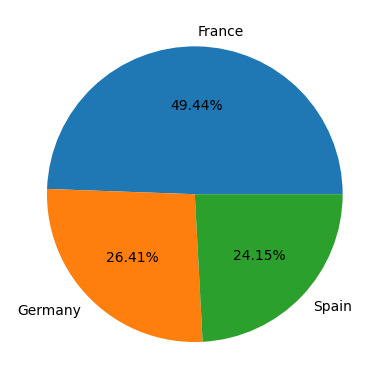

In [36]:
df = dataset[dataset['Gender'] == 'Female']
df = df[df['HasCrCard'] == 1]
df = df.groupby(['Geography']).size().reset_index(name = 'count')
countries = ['France', 'Germany', 'Spain']
print(df)
data = [df['count'][0], df['count'][1], df['count'][2]]
plt.pie(data, labels = countries, autopct = '%0.2f%%')
plt.show()